# Data Analysis

In [2]:
# Importing files

# Analysing
import pandas as pd


# Visualizing
import sweetviz as sv
import seaborn as sns

# Scalling
from sklearn.preprocessing import StandardScaler

# Modeling
import sklearn

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.metrics import mean_squared_error as mse

In [3]:
# Reading data files
df=pd.read_csv("dataset//train.csv")
df

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exploratory Data Analysis

In [3]:
repo=sv.analyze(df, 'Survived')
repo.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Cleaning the Data

In [4]:

df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


### Manupulating the Data

In [5]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
df.set_index("PassengerId", inplace=True)

sex={'male':0, 'female':1}
embarked={'S':0, "C":1, 'Q':2}
df["Sex"]=df["Sex"].map(sex)
df["Embarked"]=df["Embarked"].map(embarked)

### Scaling the Data

In [6]:

neumerical_features=['Age','Fare']
categorical_features=['Pclass','Sex','Embarked', 'SibSp', 'Parch']
ss= StandardScaler()
ss.fit(df[neumerical_features])
df[neumerical_features]=ss.transform(df[neumerical_features])
df=pd.get_dummies(df, columns=categorical_features)

### Modelling the Data and making Predictions

In [7]:
df=sklearn.utils.shuffle(df) 

X=df.drop("Survived", axis=1).values   
Y=df["Survived"].values                
test_size=100

X_train=X[:-test_size]
Y_train=Y[:-test_size]

X_test=X[-test_size:]
Y_test=Y[-test_size:]

lr.fit(X_train, Y_train)

result=lr.predict(X_test)

score1= lr.score(X_test,Y_test)
print("Score:", score1)

mse1= mse(Y_test,result)
print("MSE:", mse1)



Score: 0.82
MSE: 0.18


### Ploting the Predicted and Actual Values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

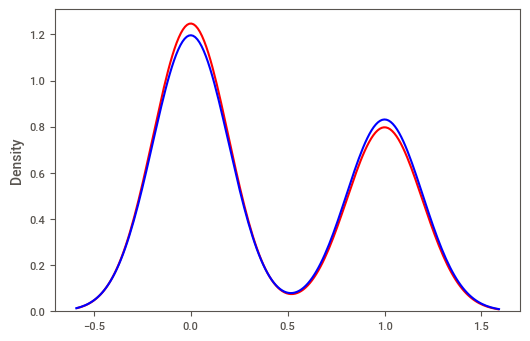

In [8]:
ax1=sns.distplot(Y_test, hist=False, color='r', label="Actual")
sns.distplot(result, hist=False, color='b', label="Predicted", ax=ax1)